In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

/home/philippe/MolGenDocking


/home/philippe/miniconda3/envs/MolGen/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from pathlib import Path
import json
import re

import pandas as pd
import numpy as np
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit import DataStructs

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import roc_curve, roc_auc_score
from notebooks.utils import PandasTableFormatter
from mol_gen_docking.evaluation.diversity_aware_top_k import diversity_aware_top_k
from notebooks.utils import *
from mol_gen_docking.data.pydantic_dataset import read_jsonl
import jsonlines
from tqdm.auto import tqdm

tqdm.pandas()

FIG_PATH = "MolGenDocking-latex/Figures/Others"
os.makedirs(FIG_PATH, exist_ok=True)


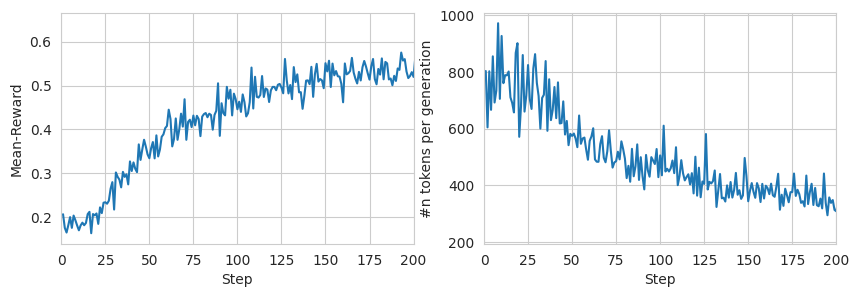

In [24]:
df = pd.read_csv("notebooks/others/training_curve_1.csv")

fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharex=True)
sns.lineplot(df, x="Step", y="Group: 260106_molstral_24b_instruct_ablation_debug_run001__DATA_all - train/online/generations/group/molecular_docking_verifier/reward/correctness",ax = axes[0])
axes[0].set_ylabel("Mean-Reward")
axes[0].set_xlim(0, 200)

df = pd.read_csv("notebooks/others/training_curve_3.csv")
sns.lineplot(df, x="Step", y="Group: 260106_molstral_24b_instruct_ablation_debug_run001__DATA_all - train/ppo_loss/n_tokens", ax = axes[1])
axes[1].set_ylabel("#n tokens per generation")

fig.savefig(f"{FIG_PATH}/training_curves.pdf", bbox_inches='tight')